In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [140]:
df_original = pd.read_csv('../train.csv')

df = df_original.copy()
df.drop(['house_id'], axis=1, inplace=True)

In [141]:
df.columns

Index(['date', 'location', 'type', 'block', 'street', 'storey_range',
       'area_sqm', 'flat_model', 'commence_date', 'price'],
      dtype='object')

In [142]:
categorical = ['location', 'type', 'block', 'street', 'storey_range', 'flat_model']

In [143]:
col_out ='price'

In [144]:
# 카이 제곱 검정
from scipy.stats import chi2_contingency
results = []
for i in range(len(categorical)):
    for j in range(i+1,len(categorical)):
        contigency_table = pd.crosstab(df[categorical[i]], df[categorical[j]])

        chi2, p, dof, expected = chi2_contingency(contigency_table)

        results.append({
            'Variable 1': categorical[i],
            'Variable 2': categorical[j],
            'Chi2': chi2,
            'p-value': p,
            'dof': dof
        })

results_df = pd.DataFrame(results)
print(results_df)

      Variable 1    Variable 2          Chi2  p-value      dof
0       location          type  8.431439e+04      0.0      150
1       location         block  1.467922e+06      0.0    49575
2       location        street  6.790900e+06      0.0    13025
3       location  storey_range  2.549412e+04      0.0      325
4       location    flat_model  2.618215e+05      0.0      375
5           type         block  2.676515e+05      0.0    11898
6           type        street  3.102219e+05      0.0     3126
7           type  storey_range  9.575960e+03      0.0       78
8           type    flat_model  7.313950e+05      0.0       90
9          block        street  3.407444e+07      0.0  1033143
10         block  storey_range  1.443820e+05      0.0    25779
11         block    flat_model  6.525063e+05      0.0    29745
12        street  storey_range  1.063902e+05      0.0     6773
13        street    flat_model  9.840992e+05      0.0     7815
14  storey_range    flat_model  1.624533e+04      0.0  

In [145]:
df.columns

Index(['date', 'location', 'type', 'block', 'street', 'storey_range',
       'area_sqm', 'flat_model', 'commence_date', 'price'],
      dtype='object')

In [146]:
numerical = ['area_sqm', 'commence_date']

# AREA_SQM 이상치 정리

In [147]:
# 평균과 표준편차를 사용한 이상치 제거
mean = df['area_sqm'].mean()
std_dev = df['area_sqm'].std()
threshold = 3

In [148]:
df = df[(df['area_sqm'] >= mean - threshold * std_dev) & (df['area_sqm'] <= mean + threshold * std_dev)]


In [149]:
df

,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0
...,...,...,...,...,...,...,...,...,...,...
271716,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0
271717,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0
271718,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0
271719,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0


<Axes: xlabel='area_sqm', ylabel='price'>

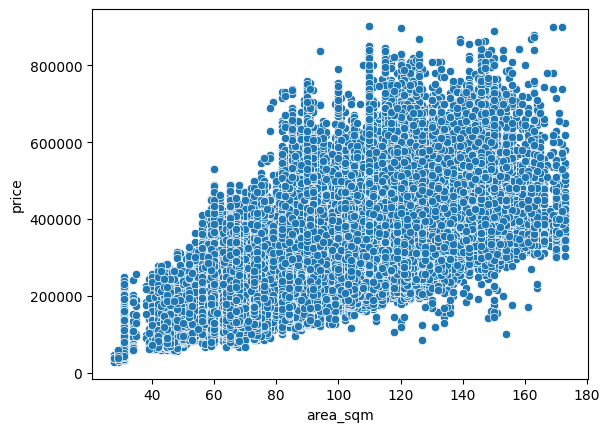

In [150]:
sns.scatterplot(x='area_sqm', y='price', data=df)

In [151]:
df['log_area_sqm'] = df['area_sqm'].apply(lambda x: np.log(x))

In [152]:
df = df.drop(['area_sqm'], axis=1)

# Commence_date 표준화

In [153]:
df['commence_date'].unique()

array([2003, 1988, 1976, 1977, 1998, 2000, 1993, 1992, 1970, 1983, 1987,
       1984, 1996, 1978, 1980, 1979, 1982, 1997, 1985, 1967, 2001, 1986,
       1974, 1981, 1989, 1999, 2005, 1973, 1995, 2002, 2006, 1994, 1975,
       1969, 1968, 2004, 1971, 1990, 1972, 1991, 2007, 1966, 2008, 2009,
       2010])

In [154]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
df['commence_date_minmax'] = scaler_minmax.fit_transform(df[['commence_date']])


In [155]:
df['commence_date_minmax']

0         0.840909
1         0.500000
2         0.227273
3         0.250000
4         0.727273
            ...   
271716    0.522727
271717    0.681818
271718    0.863636
271719    0.750000
271720    0.613636
Name: commence_date_minmax, Length: 270912, dtype: float64

In [156]:
df = df.drop(['commence_date'], axis=1)
df

,date,location,type,block,street,storey_range,flat_model,price,log_area_sqm,commence_date_minmax
0,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,D,313000.0,4.700480,0.840909
1,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,N,167000.0,4.158883,0.500000
2,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,K,430000.0,4.521789,0.227273
3,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,K,303800.0,4.521789,0.250000
4,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,G,212000.0,4.624973,0.727273
...,...,...,...,...,...,...,...,...,...,...
271716,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,G,232000.0,4.634729,0.522727
271717,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,G,428000.0,4.897840,0.681818
271718,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,D,548888.0,4.770685,0.863636
271719,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,I,360000.0,4.499810,0.750000


# Flat Model &  storey_range Label encoding


In [157]:
from sklearn.preprocessing import LabelEncoder


In [158]:
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['flat_model'])


In [159]:
df

,date,location,type,block,street,storey_range,price,log_area_sqm,commence_date_minmax,flat_model_A,...,flat_model_G,flat_model_H,flat_model_I,flat_model_J,flat_model_K,flat_model_L,flat_model_M,flat_model_N,flat_model_O,flat_model_P
0,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,313000.0,4.700480,0.840909,False,...,False,False,False,False,False,False,False,False,False,False
1,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,167000.0,4.158883,0.500000,False,...,False,False,False,False,False,False,False,True,False,False
2,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,430000.0,4.521789,0.227273,False,...,False,False,False,False,True,False,False,False,False,False
3,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,303800.0,4.521789,0.250000,False,...,False,False,False,False,True,False,False,False,False,False
4,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,212000.0,4.624973,0.727273,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271716,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,232000.0,4.634729,0.522727,False,...,True,False,False,False,False,False,False,False,False,False
271717,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,428000.0,4.897840,0.681818,False,...,True,False,False,False,False,False,False,False,False,False
271718,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,548888.0,4.770685,0.863636,False,...,False,False,False,False,False,False,False,False,False,False
271719,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,360000.0,4.499810,0.750000,False,...,False,False,True,False,False,False,False,False,False,False


In [160]:
df['type_encoded'] = label_encoder.fit_transform(df['type'])

In [161]:
df = df.drop(['type'], axis=1)

In [162]:
df['storey_range_encoded'] = label_encoder.fit_transform(df['storey_range'])
df = df.drop(['storey_range'], axis=1)

# Location

In [163]:
df = pd.get_dummies(df, columns=['location'])
df = df.drop(['location'], axis = 1)

KeyError: "['location'] not found in axis"